## Setup


In [1]:
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from nnpde2diff1d import NNPDE2DIFF1D
from pde2diff1d import PDE2DIFF1D

In [2]:
%%javascript
MathJax.Hub.Config({
      TeX: { equationNumbers: { autoNumber: "AMS" } }
    });MathJax.Hub.Queue(
  ["resetEquationNumbers", MathJax.InputJax.TeX],
  ["PreProcess", MathJax.Hub],
  ["Reprocess", MathJax.Hub]
);
MathJax.Hub.Queue(
  ["resetEquationNumbers", MathJax.InputJax.TeX],
  ["PreProcess", MathJax.Hub],
  ["Reprocess", MathJax.Hub]
);

<IPython.core.display.Javascript object>

### Create the training data.

In [3]:
nx = 41
nt = 41
xt = np.linspace(0, 1, nx)
tt = np.linspace(0, 1, nt)
x_train = np.array(list(zip(np.tile(xt, nt), np.repeat(tt, nx))))

### Read the differential equation.

In [4]:
eq_name = 'diff1d_decrease'
eq = PDE2DIFF1D(eq_name)

### Compute the analytical solution.

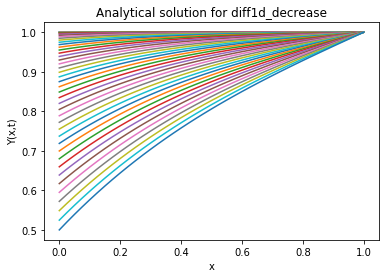

In [5]:
n = nx*nt
Ya = np.zeros(n)
for i in range(n):
    Ya[i] = eq.Yaf(x_train[i])
Ya = Ya.reshape((nt, nx))
for i in range(nt):
    plt.plot(xt, Ya[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Y(x,t)')
# plt.legend(loc='right')
plt.title('Analytical solution for %s' % eq_name);

## BFGS (default)

In [7]:
net1 = NNPDE2DIFF1D(eq)
trainalg = 'BFGS'
options = {}
options['disp'] = True
opts = {}
# Overflow with seed: 0
np.random.seed(0)
print(datetime.datetime.now())
%timeit -n 1 -r 1 net1.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net1.res)

2018-10-05 17:11:28.133026
Optimization terminated successfully.
         Current function value: 0.000069
         Iterations: 4914
         Function evaluations: 5253
         Gradient evaluations: 5253
2h 56min 25s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
      fun: 6.866975598678709e-05
 hess_inv: array([[ 5.04510221e+04, -2.86769817e+03,  1.13331116e+03, ...,
        -7.79088861e+03,  2.14839874e+03, -1.12215314e+02],
       [-2.86768975e+03,  2.35617187e+03,  3.85408679e+01, ...,
        -1.30823004e+03,  2.65613316e+01,  5.70183222e+01],
       [ 1.13332439e+03,  3.85427144e+01,  1.74258522e+02, ...,
        -3.23145634e+02,  7.89901014e+01,  1.01782053e+02],
       ...,
       [-7.79091553e+03, -1.30822715e+03, -3.23146136e+02, ...,
         2.20480057e+04, -2.64924314e+03, -4.45585351e+02],
       [ 2.14841361e+03,  2.65570535e+01,  7.89892500e+01, ...,
        -2.64924370e+03,  6.84656142e+02,  3.93777033e+02],
       [-1.12196637e+02,  5.70116533e+01,  1.0178

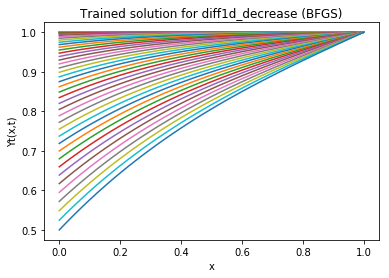

In [8]:
Yt1 = net1.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt1[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
# plt.legend(loc='right')
plt.title('Trained solution for %s (%s)' % (eq_name, trainalg));

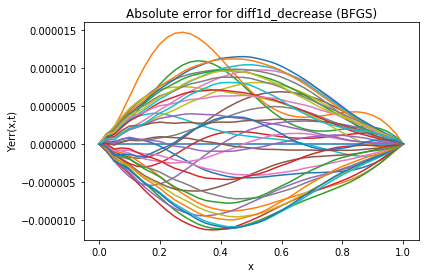

In [9]:
Y_err1 = Yt1 - Ya
for i in range(nt):
    plt.plot(xt, Y_err1[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
# plt.legend(loc='right')
plt.title('Absolute error for %s (%s)' % (eq_name, trainalg));

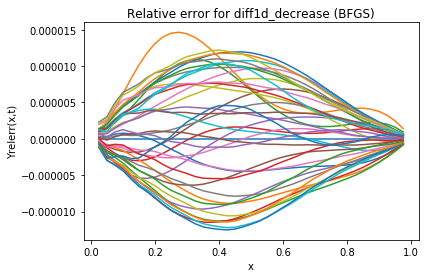

In [10]:
Yrelerr1 = (Yt1[:, 1:-1] - Ya[:, 1:-1])/Ya[:, 1:-1]
for i in range(nt):
    plt.plot(xt[1:-1], Yrelerr1[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yrelerr(x,t)')
# plt.legend(loc='right')
plt.title('Relative error for %s (%s)' % (eq_name, trainalg));

## BFGS (gtol=1e-6)

In [11]:
net2 = NNPDE2DIFF1D(eq)
trainalg = 'BFGS'
options = {}
options['disp'] = True
options['gtol'] = 1e-6
opts = {}
# Overflow with seed: 0,1
np.random.seed(0)
print(datetime.datetime.now())
%timeit -n 1 -r 1 net2.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net2.res)

2018-10-05 21:30:42.254172
         Current function value: 0.000065
         Iterations: 5894
         Function evaluations: 6322
         Gradient evaluations: 6310
3h 33min 20s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
      fun: 6.527445050551003e-05
 hess_inv: array([[ 46293.48705896,   -918.86878552,    262.72265742, ...,
        -11183.20172647,  -4300.20911625,   -645.10571328],
       [  -987.37646997,   2773.45660425,   -718.02884819, ...,
         -2734.08359472,   -598.41452105,   -180.94693992],
       [   305.02942237,   -716.91286594,    697.70291083, ...,
           206.90511916,    296.81332152,     79.78708495],
       ...,
       [-11273.02461843,  -2862.7520036 ,    278.83941213, ...,
         63206.80630718,  26056.4411629 ,   5297.77514991],
       [ -4326.92745363,   -723.53618069,    369.22440101, ...,
         26020.20953386,  13902.44344408,   3135.69355236],
       [  -624.82767856,   -215.3903541 ,    100.73609183, ...,
          5244.24979564

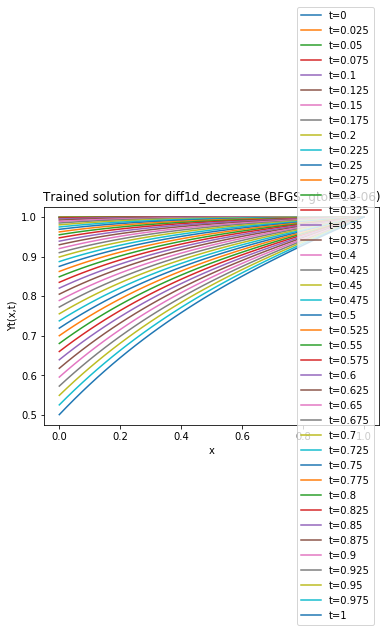

In [12]:
Yt2 = net2.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt2[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s, gtol=%g)' % (eq_name, trainalg, options['gtol']));

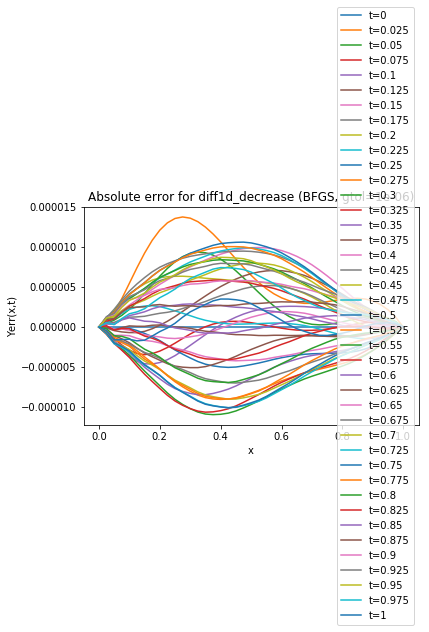

In [13]:
Y_err2 = Yt2 - Ya
for i in range(nt):
    plt.plot(xt, Y_err2[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s, gtol=%g)' % (eq_name, trainalg, options['gtol']));

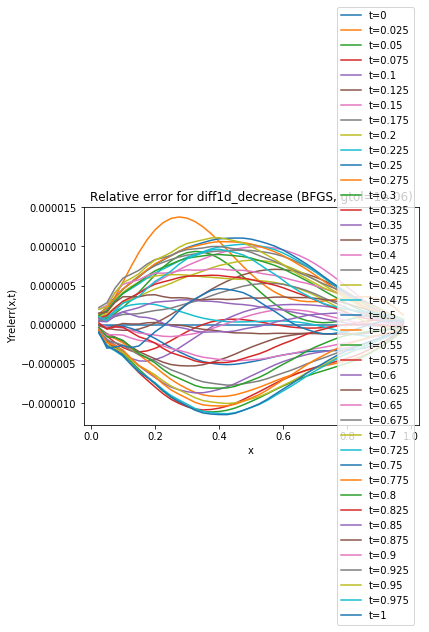

In [14]:
Yrelerr2 = (Yt2[:, 1:-1]-Ya[:, 1:-1])/Ya[:,1:-1]
for i in range(nt):
    plt.plot(xt[1:-1], Yrelerr2[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yrelerr(x,t)')
plt.legend(loc='right')
plt.title('Relative error for %s (%s, gtol=%g)' % (eq_name, trainalg, options['gtol']));